Importação da biblioteca para plotar grafos


In [ ]:
import networkx as nx

Função de teste para plotar grafos coloridos aleatóriamente

In [ ]:
from random import *

def cria_grafo_colorido(quantidade_vertices, taxa_aresta):
  Grafo = nx.Graph()
  color_map = []
  
  # Cria nós
  for i in range(quantidade_vertices):
    Grafo.add_node(i)
  
  # Adiciona arestas de forma aleatoria entre os nós
  for i in range(quantidade_vertices):
    for j in range(quantidade_vertices):
      if i == j:
        continue
      if randint(0,99) <= taxa_aresta:
        Grafo.add_edge(i,j)

  # Colore de forma aleatória os nós
  for i in range(quantidade_vertices):
    cor = randint(0,2)
    if cor == 0:
      color_map.append('red')
    elif cor == 1:
      color_map.append('green')
    elif cor == 2:
      color_map.append('blue')

  # Desenha o grafo
  nx.draw(Grafo, with_labels = True, node_size = 50, node_color = color_map)
  print(nx.to_edgelist(Grafo))
  return (nx.to_dict_of_dicts(Grafo),color_map)

[(0, 3, {}), (0, 5, {}), (0, 11, {}), (0, 13, {}), (0, 14, {}), (0, 15, {}), (0, 20, {}), (0, 21, {}), (0, 23, {}), (0, 24, {}), (0, 25, {}), (0, 27, {}), (0, 28, {}), (0, 29, {}), (0, 30, {}), (0, 31, {}), (0, 35, {}), (0, 40, {}), (0, 43, {}), (0, 44, {}), (0, 45, {}), (0, 50, {}), (0, 51, {}), (0, 52, {}), (0, 55, {}), (0, 56, {}), (0, 58, {}), (0, 60, {}), (0, 61, {}), (0, 62, {}), (0, 63, {}), (0, 64, {}), (0, 66, {}), (0, 70, {}), (0, 71, {}), (0, 75, {}), (0, 76, {}), (0, 78, {}), (0, 81, {}), (0, 82, {}), (0, 84, {}), (0, 86, {}), (0, 89, {}), (0, 4, {}), (0, 8, {}), (0, 12, {}), (0, 26, {}), (0, 33, {}), (0, 36, {}), (0, 38, {}), (0, 53, {}), (0, 69, {}), (0, 72, {}), (0, 73, {}), (0, 74, {}), (0, 79, {}), (0, 88, {}), (1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (1, 10, {}), (1, 12, {}), (1, 15, {}), (1, 17, {}), (1, 20, {}), (1, 23, {}), (1, 25, {}), (1, 29, {}), (1, 30, {}), (1, 35, {}), (1, 44, {}), (1, 47, {}), (1, 48, {}), (1, 50, {

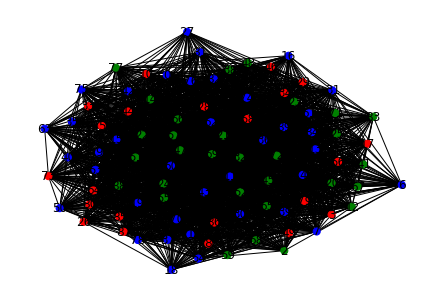

In [ ]:
# Chamando criação de grafo a partir de uma quantidade de vertices e uma taxa de geração de arestas
taxa_aresta = 35
quantidade_vertices = 90
grafo, cores = cria_grafo_colorido(quantidade_vertices, taxa_aresta)

# Função objetivo
  Esta função objetivo conta a quantidade de arestas inválidas para esse problema, ou seja, arestas contendo vertices com cores repetidas.

In [ ]:
def funcao_objetivo(cores,grafo):
  arestas_invalidas = 0
  
  for vertice in grafo.keys():
    for vertice_vizinho in grafo[vertice].keys():
      if cores[vertice] == cores[vertice_vizinho]:
        arestas_invalidas += 1
    
  return arestas_invalidas

funcao_objetivo(cores,grafo)

46

# Função para gerar N cromossomos
Essa função gera n cromossomos informando o menor valor inteiro a ser gerado, o maior valor inteiro, o tamanho do cromossomo e a quantidade de cromossomos a ser gerados.

In [ ]:
from random import *

def Gerar_n_cromossomos(inicio_intervalo, fim_intervalo, tam_cromossomo, quantidade):
  cromossomos = []

  for i in range(0, quantidade):
    elementos = []

    for i in range(tam_cromossomo):
      elementos.append(randint(inicio_intervalo,fim_intervalo))

    cromossomos.append(Cromossomo(elementos))
  
  return cromossomos 

# Classe cromossomo
A classe cromossomo é definida tendo um conjunto de elementos sendo candidados a cores de vertices.

A função objetivo precisa receber o grafo informado para calcular quantas atestas são inválidas, para esse problema, queremos zerar a quantidade de arestas inválidas.

In [ ]:
class Cromossomo:
  def __init__(self,elementos):
    self.elementos = elementos
    self.f = 0

  def funcao_objetivo(self,grafo):
    arestas_invalidas = 0
    cores = self.elementos
    
    for vertice in grafo.keys():
      for vertice_vizinho in grafo[vertice].keys():
        if cores[vertice] == cores[vertice_vizinho]:
          arestas_invalidas += 1

    self.f = arestas_invalidas

  def __lt__(self, cromossomo):
    return cromossomo.f < self.f

  def __str__(self):
    return "Cromossomo ({}), \t Funcao objetivo = {}".format(self.elementos,self.f)
  
  def __repr__(self):
    return self.__str__()

# Funções necessários para o algoritmo
Aqui foram implementadas as funções: 

*   **Crossover**: para realizar o crossover de 2 cromossomos, passando como parametro os dois cromossomos e a taxa de crossover.
*   **Mutação**: para realizar a mutação de um cromossomo, passando como parâmetro, o cromossomo e a taxa de mutação.
*   **Sorteio**: para realizar um o sorteio do tipo ranking linear, informando como parâmetro o fit acumulado.

In [ ]:
from random import *

def crossover(cromossomo1,cromossomo2,taxa_crossover):
  tam = len(cromossomo1.elementos)

  if(random() < taxa_crossover):
    corte = randint(0,tam-1)
    elementos1 = cromossomo1.elementos.copy()
    elementos2 = cromossomo2.elementos.copy()

    filho1 = Cromossomo(elementos1[:corte]+elementos2[corte:])
    filho2 = Cromossomo(elementos2[:corte]+elementos1[corte:])

    return filho1,filho2

  return cromossomo1,cromossomo2

def mutacao(cromossomo,taxa_mutacao):
  if(random() < taxa_mutacao):
    tam = len(cromossomo.elementos)
    elementos = cromossomo.elementos.copy()

    indice = randint(0,tam-1)
    elementos[indice] = randint(0,2)

    return Cromossomo(elementos)
  return cromossomo


def sorteia(fit_acumulado):
  min = fit_acumulado[0]
  max = fit_acumulado[-1]
  N = len(fit_acumulado)

  num = randint(0,N)
  f = min + (max - min)*(N - num)/(N - 1) 

  for indice,elemento in enumerate(fit_acumulado):
    #print(indice,elemento)
    if f <= elemento:
      return indice
  return N-1

def avalia_populacao(cromossomos,grafo):
  for cromossomo in cromossomos:
      cromossomo.funcao_objetivo(grafo)

In [ ]:
def algoritmo_genetico(grafo,cromossomos, taxa_crossover, taxa_mutacao, qtd_geracao):
  tam = len(cromossomos)
  geracao = 0

  melhores = []
  medias = []
  piores = []
  
  fitness_acumulado = []

  soma = 0
  for i in range(0,tam):
    soma += i
    fitness_acumulado.append(soma)

  nova_geracao = []

  avalia_populacao(cromossomos,grafo)

  while geracao < qtd_geracao:
    nova_geracao = []

    cromossomos.sort()

    for i in range(0,round(tam/2)):
      p1 = cromossomos[sorteia(fitness_acumulado)]
      p2 = cromossomos[sorteia(fitness_acumulado)]

      f1,f2 = crossover(p1,p2,taxa_crossover)
      f1 = mutacao(f1,taxa_mutacao)
      f2 = mutacao(f2,taxa_mutacao)

      nova_geracao.append(f1)
      nova_geracao.append(f2)

    cromossomos = nova_geracao

    avalia_populacao(cromossomos,grafo)

    media = 0

    for cromossomo in cromossomos:
      media += cromossomo.f
    
    media = media/tam

    melhores.append(cromossomos[-1])
    medias.append(media)
    piores.append(cromossomos[0])

    if media == 1:
      break

    geracao += 1

  return piores,melhores,medias,geracao

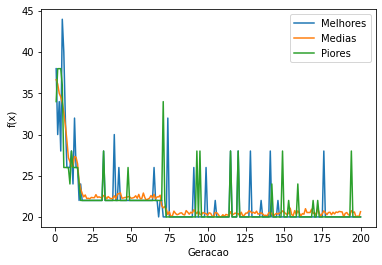

[Cromossomo ([2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1]), 	 Funcao objetivo = 38,
 Cromossomo ([2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0]), 	 Funcao objetivo = 30,
 Cromossomo ([2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1]), 	 Funcao objetivo = 34,
 Cromossomo ([2, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0]), 	 Funcao objetivo = 28,
 Cromossomo ([0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0]), 	 Funcao objetivo = 44,
 Cromossomo ([0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0]), 	 Funcao objetivo = 40,
 Cromossomo ([0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0]), 	 Funcao objetivo = 32,
 Cromossomo ([0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0]), 	 Funcao objetivo = 26,
 Cromossomo ([0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0]), 	 Funcao objetivo = 26,
 Cromossomo ([0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0]), 	 Funcao objetivo = 26,
 Cromossomo ([2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1]), 	 Funcao objetivo = 28,
 Cromossomo ([0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1]), 	 Fu

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import *

id_primeira_cor = 0;
id_ultima_cor = 2;
qntde_cromossomos = 60;
taxa_crossover = 0.6;
taxa_mutacao = 0.1;
num_geracoes = 200;

cromossomos = Gerar_n_cromossomos(id_primeira_cor, id_ultima_cor, quantidade_vertices, qntde_cromossomos)
piores,melhores,medias,geracao = algoritmo_genetico(grafo, cromossomos, taxa_crossover, taxa_mutacao, num_geracoes)

y_piores,y_melhores,y_medias = [],[],[]

for i in range(0,geracao):
  y_melhores.append(melhores[i].f)
  y_medias.append(medias[i])
  y_piores.append(piores[i].f)

geracoes = np.arange(1, geracao+1, 1)

plt.plot(geracoes,y_melhores,geracoes,y_medias,geracoes,y_piores)
plt.ylabel('f(x)')
plt.xlabel('Geracao')
plt.legend(['Melhores','Medias','Piores'])
plt.show()

melhores

In [ ]:
def Plotar_grafo(dicionario,cores):
  color_map = []

  for i in cores:
    if i == 0:
      color_map.append('red')
    elif i == 1:
      color_map.append('green')
    elif i == 2:
      color_map.append('blue')
  
  Grafo = nx.Graph()

  for vertice in dicionario.keys():
    Grafo.add_node(vertice)

  for vertice in dicionario.keys():
    for vertice_vizinho in dicionario[vertice].keys():
      Grafo.add_edge(vertice,vertice_vizinho)
  
  nx.draw(Grafo, with_labels=True, node_size=12,node_color=color_map)    

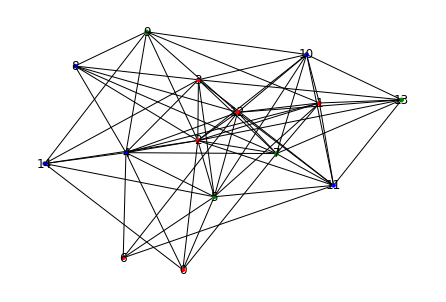

In [ ]:
Plotar_grafo(grafo, melhores[-1].elementos)

Gerar o grafo de 15 vértices coloridos com menor número de cores

In [ ]:
import networkx as nx

{0: {2: {}, 5: {}, 7: {}, 14: {}, 4: {}}, 2: {0: {}, 1: {}, 3: {}, 5: {}, 7: {}, 8: {}, 10: {}, 11: {}, 13: {}, 4: {}, 9: {}, 12: {}, 14: {}}, 5: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 6: {}, 10: {}, 12: {}, 11: {}, 14: {}}, 7: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 8: {}, 10: {}, 11: {}, 13: {}, 12: {}}, 14: {0: {}, 2: {}, 3: {}, 4: {}, 5: {}, 9: {}}, 4: {0: {}, 1: {}, 2: {}, 3: {}, 5: {}, 6: {}, 8: {}, 9: {}, 12: {}, 14: {}, 7: {}}, 1: {4: {}, 7: {}, 9: {}, 10: {}, 12: {}, 13: {}, 2: {}, 5: {}, 11: {}}, 9: {1: {}, 2: {}, 4: {}, 8: {}, 10: {}, 12: {}, 14: {}}, 10: {1: {}, 2: {}, 3: {}, 5: {}, 7: {}, 9: {}, 11: {}, 12: {}, 13: {}}, 12: {1: {}, 2: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 13: {}}, 13: {1: {}, 2: {}, 3: {}, 7: {}, 10: {}, 11: {}, 12: {}}, 11: {1: {}, 2: {}, 3: {}, 5: {}, 6: {}, 7: {}, 10: {}, 12: {}, 13: {}}, 3: {2: {}, 7: {}, 11: {}, 13: {}, 4: {}, 5: {}, 8: {}, 10: {}, 14: {}}, 8: {2: {}, 3: {}, 4: {}, 7: {}, 9: {}, 12: {}}, 6: {4: {}, 5: {}, 12: {}, 11: 

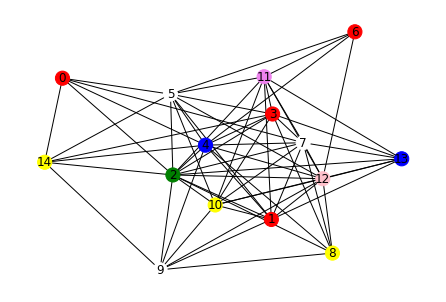

In [ ]:
g = nx.from_edgelist([(0, 2, {}), (0, 5, {}), (0, 7, {}), (0, 14, {}), (0, 4, {}), (1, 4, {}), (1, 7, {}), (1, 9, {}), (1, 10, {}), (1, 12, {}), (1, 13, {}), (1, 2, {}), 
                      (1, 5, {}), (1, 11, {}), (2, 3, {}), (2, 5, {}), (2, 7, {}), (2, 8, {}), (2, 10, {}), (2, 11, {}), (2, 13, {}), (2, 4, {}), (2, 9, {}), (2, 12, {}), 
                      (2, 14, {}), (3, 7, {}), (3, 11, {}), (3, 13, {}), (3, 4, {}), (3, 5, {}), (3, 8, {}), (3, 10, {}), (3, 14, {}), (4, 5, {}), (4, 6, {}), (4, 8, {}), 
                      (4, 9, {}), (4, 12, {}), (4, 14, {}), (4, 7, {}), (5, 6, {}), (5, 10, {}), (5, 12, {}), (5, 11, {}), (5, 14, {}), (6, 12, {}), (6, 11, {}), (7, 8, {}), 
                      (7, 10, {}), (7, 11, {}), (7, 13, {}), (7, 12, {}), (8, 9, {}), (8, 12, {}), (9, 10, {}), (9, 12, {}), (9, 14, {}), (10, 11, {}), (10, 12, {}), (10, 13, {}), 
                      (11, 12, {}), (11, 13, {}), (12, 13, {})])
dicionario = nx.to_dict_of_dicts(g)
print(dicionario)

Grafo = nx.Graph()

for vertice in dicionario.keys():
  Grafo.add_node(vertice)
for vertice in dicionario.keys():
  for vertice_vizinho in dicionario[vertice].keys():
    Grafo.add_edge(vertice,vertice_vizinho)

print(Grafo.nodes)

color_map = []
cores = Grafo.nodes
for i in cores:
  if i in [0,1,3,6]:
    color_map.append('red')
  elif i == 2:
    color_map.append('green')
  elif i in [4,13]:
    color_map.append('blue')
  elif i in [5,7,9]:
    color_map.append('white')
  elif i in [8,10,14]:
    color_map.append('yellow')
  elif i == 12:
    color_map.append('pink')
  elif i == 11:
    color_map.append('violet')
print(color_map)

  
nx.draw(Grafo, with_labels=True, node_size=200,node_color=color_map) 